In [1]:
from ChannelEstimatorCNN import ChannelEstimatorCNN
from scipy import io
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
Data_file = 'Ch_real_VehA_14.mat'
model = ChannelEstimatorCNN()

##load train data
channels = io.loadmat(Data_file)['channels']
reals = np.real(channels)
imags = np.imag(channels)

# desire outputs
out_train = np.zeros(reals.shape+(2,))
out_train[:,:,:,0] = reals
out_train[:,:,:,1] = imags

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 72, 14, 2)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 14, 64)        3136      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 14, 32)        2080      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 14, 2)         386       
Total params: 5,602
Trainable params: 5,602
Non-trainable params: 0
_________________________________________________________________


In [10]:
a,b = model.train(out_train, epochs=1)

Train on 34000 samples, validate on 6000 samples
Epoch 1/1
34000/34000 [==============================] - 109s - loss: 0.1804 - val_loss: 0.1605


In [4]:
model.scaler['max']

3.3711528778076172

In [5]:
b

array([[[ 0.51538625,  0.47000656],
        [ 0.51564357,  0.46885423],
        [ 0.51582996,  0.46762523],
        ..., 
        [ 0.514141  ,  0.45365431],
        [ 0.51356471,  0.45187079],
        [ 0.51290969,  0.45006005]],

       [[ 0.50784833,  0.47014738],
        [ 0.50824182,  0.46898744],
        [ 0.50857262,  0.46775278],
        ..., 
        [ 0.5085503 ,  0.45381423],
        [ 0.50819603,  0.45204294],
        [ 0.50776958,  0.45024597]],

       [[ 0.5006738 ,  0.47092546],
        [ 0.50122664,  0.46974142],
        [ 0.50172462,  0.4684838 ],
        ..., 
        [ 0.50355213,  0.45438618],
        [ 0.50343714,  0.45260234],
        [ 0.50325579,  0.45079378]],

       ..., 
       [[ 0.48167544,  0.68107582],
        [ 0.47802326,  0.67690718],
        [ 0.47445696,  0.67250826],
        ..., 
        [ 0.44605498,  0.62310595],
        [ 0.44335519,  0.61669289],
        [ 0.44075199,  0.61012895]],

       [[ 0.48569201,  0.67801146],
        [ 0.48186968,  

In [6]:
model.saveModel()

In [11]:
test_data = out_train[0:10,:,:,:]
test_predicted = model.test(test_data)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2,2,1)
ax.imshow(test_data[0,:,:,0])
ax = fig.add_subplot(2,2,2)
ax.imshow(test_data[0,:,:,1])
ax = fig.add_subplot(2,2,3)
ax.imshow(test_predicted[0,:,:,0])
ax = fig.add_subplot(2,2,4)
ax.imshow(test_predicted[0,:,:,1])
fig.show()

C:\Users\Ali\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [15]:
np.min(test_predicted[0,:,:,0])

-2.5241332

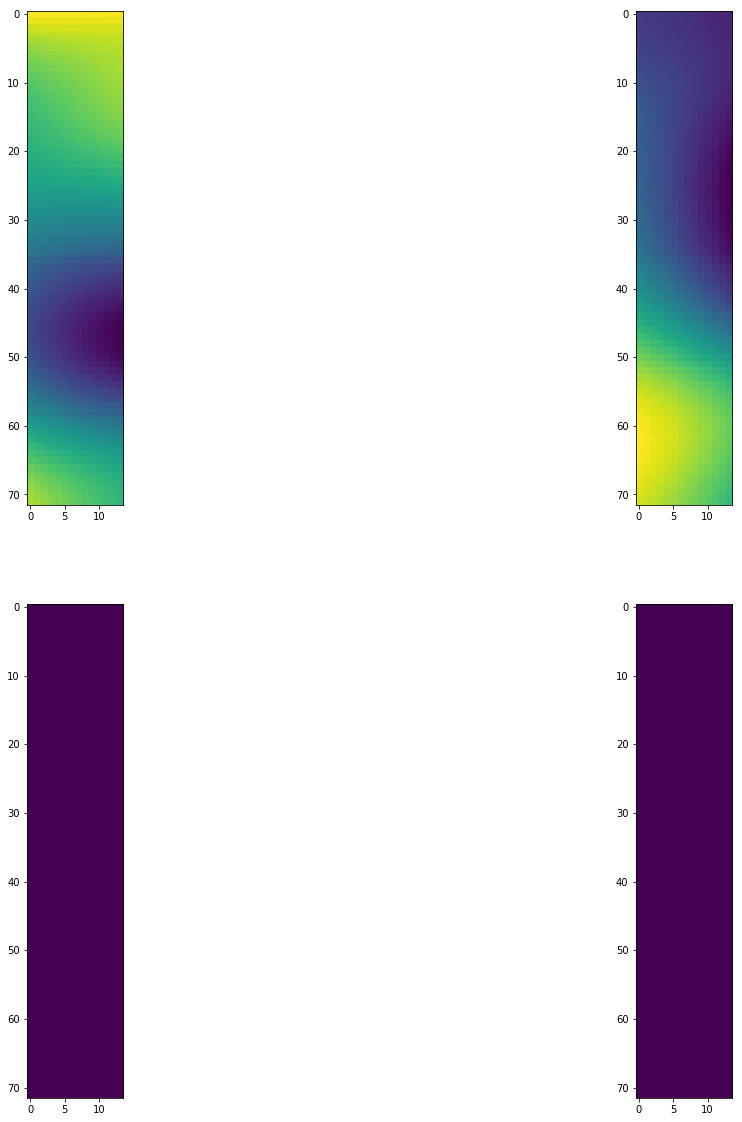

In [12]:
plt.show()